<a href="https://colab.research.google.com/github/Shruti-Chinchalkar/age-calculator/blob/main/Analyzing_Historical_Stock_Revenue_Data_and_Building_a_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For reading stock data
import yfinance as yf

# Display plots in notebook
%matplotlib inline


In [2]:
# Download historical stock data
tsla = yf.download('TSLA', start='2015-01-01', end='2025-01-01')

# Inspect data
tsla.head()


/tmp/ipython-input-3375126158.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download('TSLA', start='2015-01-01', end='2025-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,
2015-01-02,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08,14.041333,14.253333,14.000667,14.187333,51637500


In [13]:
# Load revenue data to ensure tsla_revenue is defined
tsla_revenue = pd.read_excel('Tesla_Financial_Report (1).xlsx')

# Remove missing values
tsla = tsla.dropna()
tsla_revenue = tsla_revenue.dropna()

# Convert Date to datetime
tsla['Date'] = pd.to_datetime(tsla.index)
tsla_revenue['Quarter'] = pd.to_datetime(tsla_revenue['Quarter'])

In [15]:
# Remove missing values
tsla = tsla.dropna()
tsla_revenue = tsla_revenue.dropna()

# Convert Date to datetime
tsla['Date'] = pd.to_datetime(tsla.index)
tsla_revenue['Quarter'] = pd.to_datetime(tsla_revenue['Quarter'])

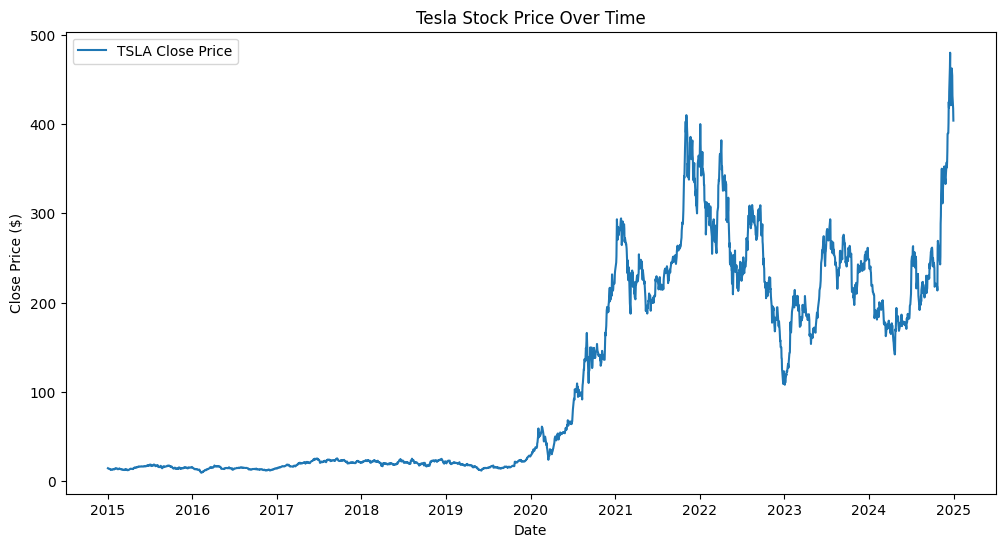

In [16]:
plt.figure(figsize=(12,6))
plt.plot(tsla['Date'], tsla['Close'], label='TSLA Close Price')
plt.title("Tesla Stock Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.legend()
plt.show()


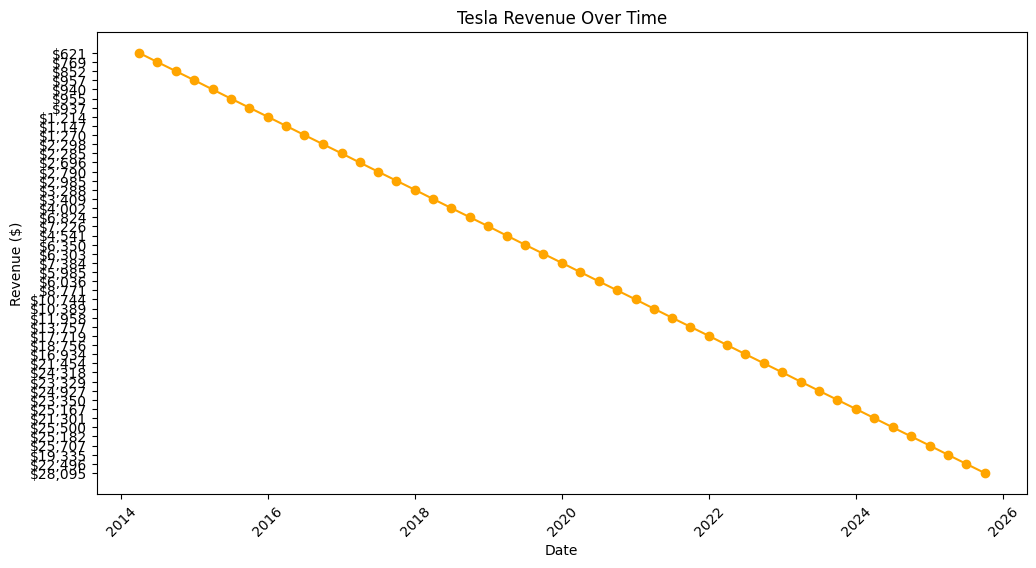

In [23]:
plt.figure(figsize=(12,6))
plt.plot(tsla_revenue['Quarter'], tsla_revenue['Revenue'], color='orange', marker='o')
plt.title("Tesla Revenue Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.xticks(rotation=45)
plt.show()

In [25]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1, shared_xaxes=True,
                    subplot_titles=("Tesla Stock Price", "Tesla Revenue"))

# Stock Price
fig.add_trace(go.Scatter(x=tsla['Date'], y=tsla['Close'], name="Stock Price"), row=1, col=1)

# Revenue
fig.add_trace(go.Bar(x=tsla_revenue['Quarter'], y=tsla_revenue['Revenue'], name="Revenue"), row=2, col=1)

fig.update_layout(height=700, width=900, title_text="Tesla Stock & Revenue Dashboard")
fig.show()